In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Dataset Creation

In [2]:
data = np.array([
    [5.1, 3.5], [4.9, 3.0], [5.8, 2.7], [6.0, 3.0], [6.7, 3.1],
    [4.5, 2.3], [6.1, 2.8], [5.2, 3.2], [5.5, 2.6], [5.0, 2.0],
    [8.0, 0.5], [7.5, 0.8], [8.1, -0.1], [2.5, 3.5], [1.0, 3.0],
    [4.5, -1.0], [3.0, -0.5], [5.1, -0.2], [6.0, -1.5], [3.5, -0.1],
    [4.0, 0.0], [6.1, 0.5], [5.4, -0.5], [5.3, 0.3], [5.8, 0.6]
])

Plotting the unclustered data


<function matplotlib.pyplot.show(close=None, block=None)>

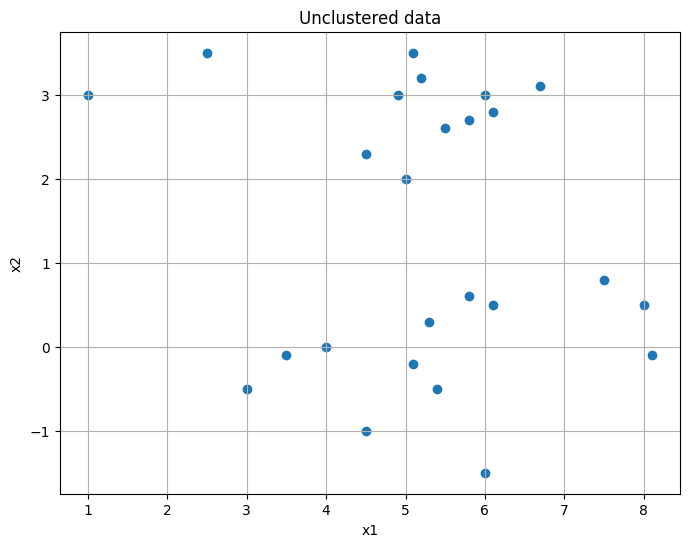

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(x=data[:,0],y=data[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Unclustered data')
plt.grid(True)
plt.show

In [4]:
class kMeans:
    def __init__(self,k=2,max_iter=100,threshold=1e-4, centroids= None):
        self.k=k
        self.max_iter=max_iter
        self.threshold=threshold
        self.centroids=centroids #1a using the given centroids to initialize
    
    def dist(self, x, y):
        return np.sqrt(np.sum((x-y)**2))

    def fit(self, X_train):
        self.X_train = np.array(X_train)
        n_samples, n_features = self.X_train.shape
        self.centroids = np.array(self.centroids)
        
        for iteration in range(self.max_iter):
            # 1b assigning the point to the clsoest centroid here
            self.clusters = [[] for _ in range(self.k)]
            for point in self.X_train:
                distances = [self.dist(point, centroid) for centroid in self.centroids]
                closest_centroid_idx = np.argmin(distances)
                self.clusters[closest_centroid_idx].append(point) 

            # 1c updating the centroid
            new_centroids = []
            for cluster in self.clusters:
                if cluster: 
                    new_centroids.append(np.mean(cluster, axis=0))
                else:
                    new_centroids.append(np.random.rand(n_features))
            new_centroids = np.array(new_centroids)

            # 1d cheking convergence 
            centroid_shift = np.linalg.norm(new_centroids - self.centroids)
            self.centroids = new_centroids
            if centroid_shift < self.threshold:
                print(f"Converged after {iteration + 1} iterations.")
                break
        
    def predict(self, X):
        labels = []
        for point in X:
            distances = [self.dist(point, centroid) for centroid in self.centroids]
            closest_centroid_idx = np.argmin(distances)
            labels.append(closest_centroid_idx)
        return np.array(labels)
    
    def get_centroids(self):
        return self.centroids

In [5]:
k = 2

In [6]:
kmeans = kMeans(k=k, centroids=np.array([[3.0, 3.0], [2.0, 2.0]]))
kmeans.fit(data)

pred = kmeans.predict(data)
kmeans.get_centroids()

Converged after 3 iterations.


array([[ 5.8       ,  2.125     ],
       [ 4.2       , -0.05555556]])

Given Centroids

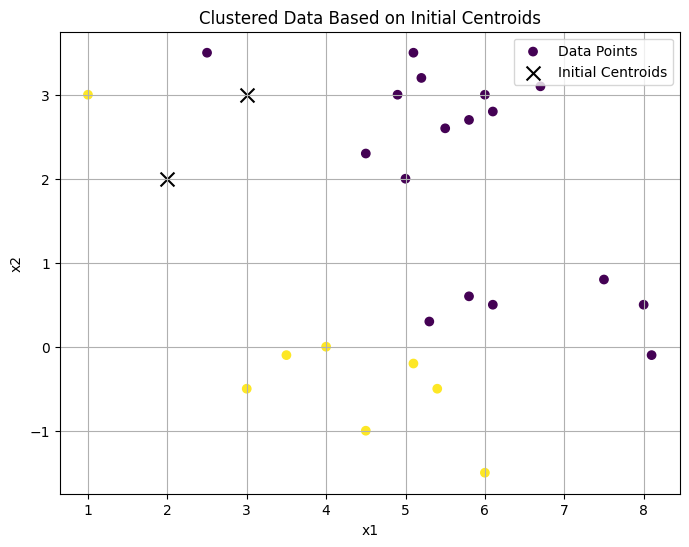

In [7]:
kmeans_intial = kMeans(k=2, centroids=np.array([[3.0, 3.0], [2.0, 2.0]]))

kmeans_intial.clusters = [[] for _ in range(kmeans_intial.k)]
for point in data:
    distances = [kmeans_intial.dist(point, centroid) for centroid in kmeans_intial.centroids]
    closest_centroid_idx = np.argmin(distances)
    kmeans_intial.clusters[closest_centroid_idx].append(point)

pred = kmeans_intial.predict(data)

plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=pred, cmap='viridis', label="Data Points")
plt.scatter(kmeans_intial.centroids[:, 0], kmeans_intial.centroids[:, 1], 
            c='black', marker='x', s=100, label="Initial Centroids")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.title('Clustered Data Based on Initial Centroids')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

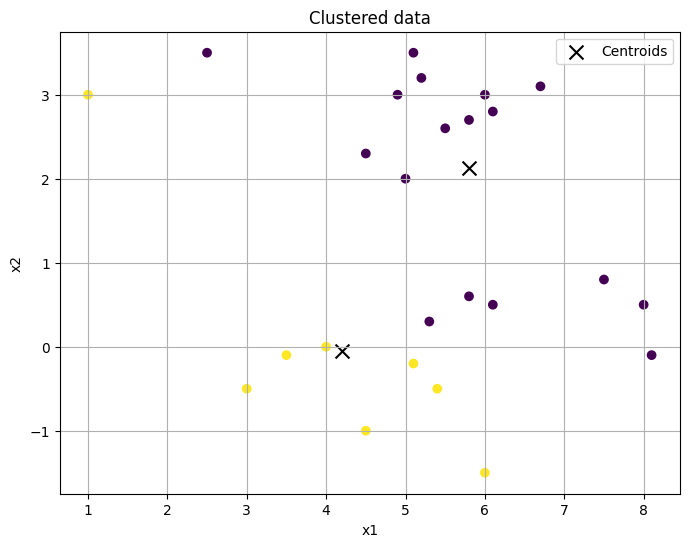

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(x=data[:,0],y=data[:,1], c=pred, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='black', marker='x', s=100, label="Centroids")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.title('Clustered data')
plt.show

In [9]:
random_centroids = data[np.random.choice(data.shape[0], k, replace=False)]
random_centroids

array([[5.1, 3.5],
       [2.5, 3.5]])

Random Centroids

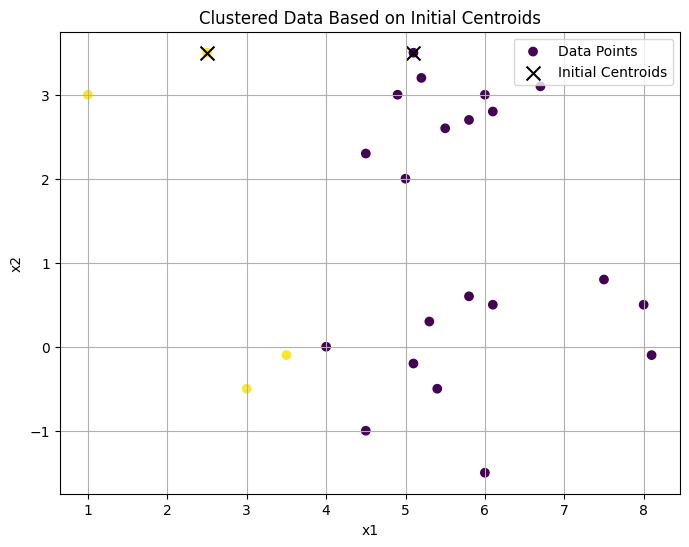

In [10]:
kmeans_intial = kMeans(k=2, centroids=random_centroids)

kmeans_intial.clusters = [[] for _ in range(kmeans_intial.k)]
for point in data:
    distances = [kmeans_intial.dist(point, centroid) for centroid in kmeans_intial.centroids]
    closest_centroid_idx = np.argmin(distances)
    kmeans_intial.clusters[closest_centroid_idx].append(point)

pred = kmeans_intial.predict(data)

plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=pred, cmap='viridis', label="Data Points")
plt.scatter(kmeans_intial.centroids[:, 0], kmeans_intial.centroids[:, 1], 
            c='black', marker='x', s=100, label="Initial Centroids")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.title('Clustered Data Based on Initial Centroids')
plt.show()

In [11]:
kmeans = kMeans(k=k, centroids=random_centroids)
kmeans.fit(data)

pred = kmeans.predict(data)
kmeans.get_centroids()

Converged after 3 iterations.


array([[5.83, 1.38],
       [2.8 , 1.18]])

<function matplotlib.pyplot.show(close=None, block=None)>

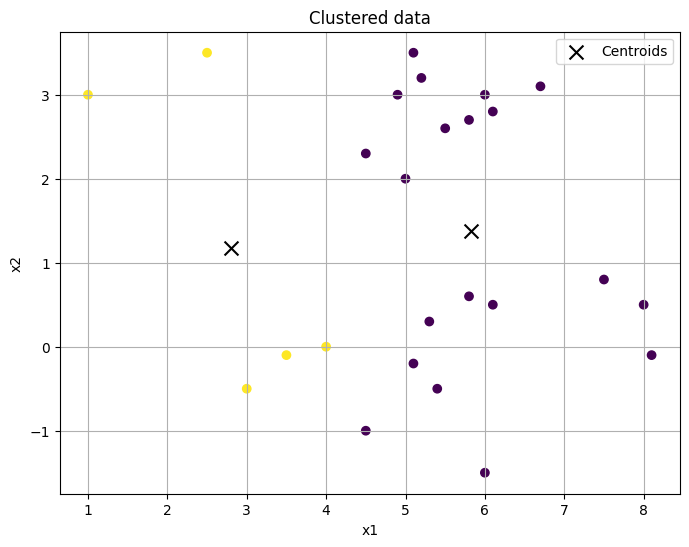

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(x=data[:,0],y=data[:,1], c=pred, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='black', marker='x', s=100, label="Centroids")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.title('Clustered data')
plt.show

Elbow Method

Converged after 2 iterations.
Converged after 6 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 7 iterations.
Converged after 2 iterations.
Converged after 5 iterations.
Converged after 6 iterations.
Converged after 4 iterations.
Converged after 4 iterations.


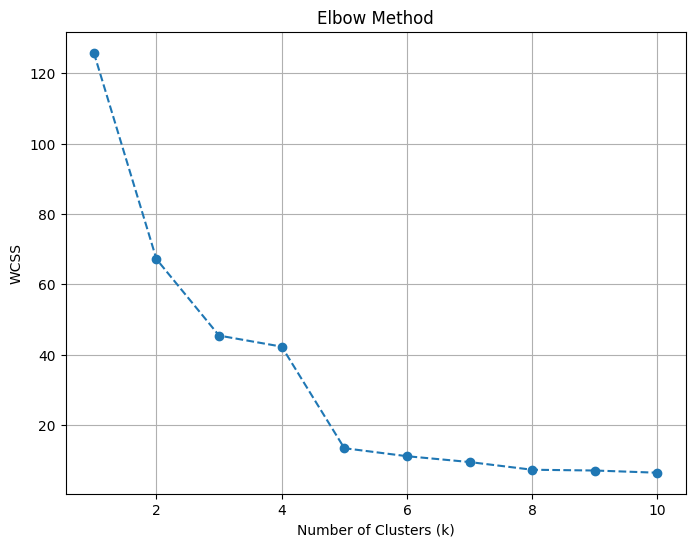

Converged after 5 iterations.


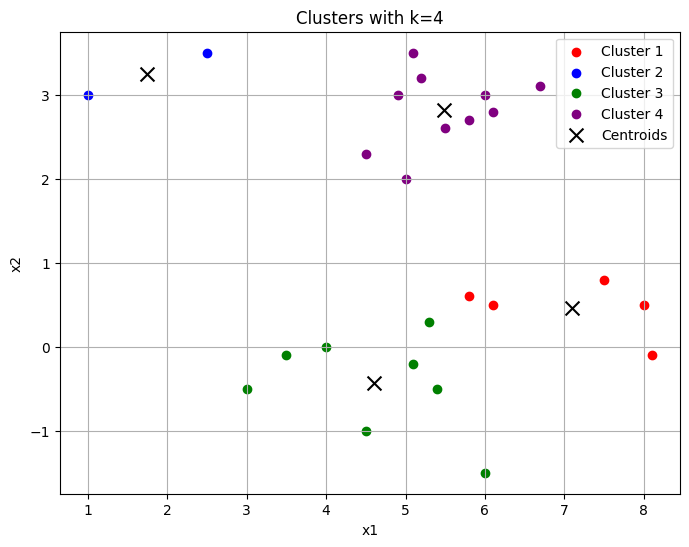

Converged after 6 iterations.


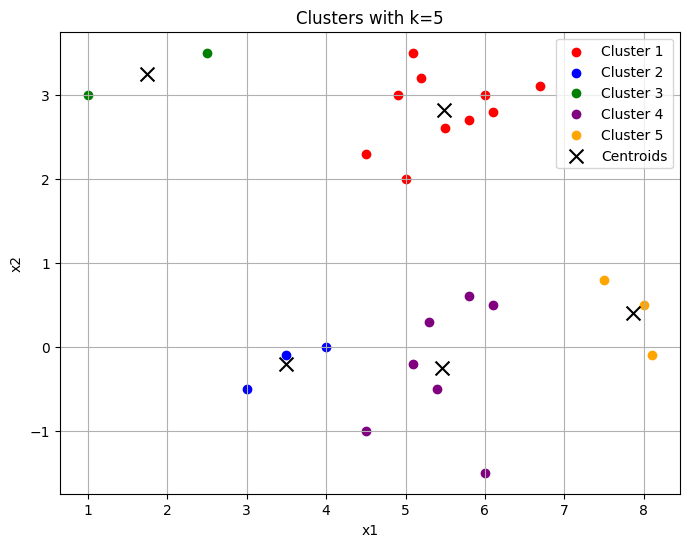

In [13]:
wcss = []
for k in range(1, 11):
    random_centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    kmeans = kMeans(k=k, centroids=random_centroids)
    kmeans.fit(data)
    # Calculate WCSS
    wcss_k = 0
    for i, cluster in enumerate(kmeans.clusters):
        cluster = np.array(cluster)
        if len(cluster) > 0:  # Avoid empty clusters
            wcss_k += np.sum((cluster - kmeans.centroids[i]) ** 2)
    wcss.append(wcss_k)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.title("Elbow Method")
plt.show()

kmeans = kMeans(k=4, centroids=data[np.random.choice(data.shape[0], 4, replace=False)] )
kmeans.fit(data)

plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'purple']
for cluster_id, points in enumerate(kmeans.clusters):
    points = np.array(points)
    if len(points) > 0:
        plt.scatter(points[:, 0], points[:, 1], label=f"Cluster {cluster_id+1}", color=colors[cluster_id])
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='black', marker='x', s=100, label="Centroids")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.title(f"Clusters with k={4}")
plt.show()

optimal_k = 5
kmeans = kMeans(k=optimal_k, centroids=data[np.random.choice(data.shape[0], optimal_k, replace=False)] )
kmeans.fit(data)

plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange']
for cluster_id, points in enumerate(kmeans.clusters):
    points = np.array(points)
    if len(points) > 0:
        plt.scatter(points[:, 0], points[:, 1], label=f"Cluster {cluster_id+1}", color=colors[cluster_id])
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='black', marker='x', s=100, label="Centroids")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.title(f"Clusters with k={optimal_k}")
plt.show()

